In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D , Flatten , Dense, InputLayer,GlobalAveragePooling2D, BatchNormalization, Dropout
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2
from matplotlib import pyplot

In [3]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
import keras


In [4]:
def load_dataset(path):
    data = load_files(path)
    condition_files = np.array(data['filenames'])
    condition_targets = np_utils.to_categorical(np.array(data['target']), 2)
    return condition_files, condition_targets

In [7]:
train_files, train_targets = load_dataset('/gdrive/MyDrive/Train')
test_files, test_targets = load_dataset('/gdrive/MyDrive/Train')


In [9]:
condition_names = [item[58:-1] for item in sorted(glob("/gdrive/MyDrive/Train/*/"))]
print (condition_names)
# print statistics about the dataset
print('There are %d total categories.' % len(condition_names))
print('There are %s total images.\n' % len(np.hstack([train_files, test_files])))
print('There are %d training images.' % len(train_files))
print('There are %d test images.'% len(test_files))

['', '']
There are 2 total categories.
There are 1800 total images.

There are 900 training images.
There are 900 test images.


In [10]:
from keras.preprocessing import image                  
from tqdm import tqdm

In [11]:
def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

In [12]:
def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)


In [13]:
from PIL import ImageFile      
import keras.utils as image                      
ImageFile.LOAD_TRUNCATED_IMAGES = True    

In [14]:
train_tensors = paths_to_tensor(train_files).astype('float32')/255

100%|██████████| 900/900 [00:16<00:00, 53.16it/s]


In [15]:
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████| 900/900 [00:15<00:00, 56.92it/s]


In [16]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential


In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))


In [18]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 flatten (Flatten)           (None, 774400)            0         
                                                                 
 dense (Dense)               (None, 128)               99123328  
                                                        

In [47]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras import utils as np_utils
from keras.optimizers import SGD
import keras


In [20]:
opt = keras.optimizers.Adadelta()

In [21]:
opt = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [22]:
from keras.callbacks import ModelCheckpoint  


In [35]:
epochs = 15

In [52]:
checkpointer = ModelCheckpoint(filepath=f'/MyDrive/weights.best.from_scratch.6.hdf5', 
                               verbose=1, save_best_only=True)

In [104]:
history=model.fit(train_tensors, train_targets, 
          validation_data=(test_tensors, test_targets),
          epochs=epochs, batch_size=10, callbacks=[checkpointer], verbose=1)

Epoch 1/15
90/90 [==============================] - ETA: 0s - loss: 0.0796 - accuracy: 0.9711
Epoch 1: val_loss did not improve from 0.04521
90/90 [==============================] - 7s 74ms/step - loss: 0.0796 - accuracy: 0.9711 - val_loss: 0.0561 - val_accuracy: 0.9856
Epoch 2/15
90/90 [==============================] - ETA: 0s - loss: 0.0610 - accuracy: 0.9822
Epoch 2: val_loss improved from 0.04521 to 0.03414, saving model to /MyDrive/weights.best.from_scratch.6.hdf5
90/90 [==============================] - 13s 143ms/step - loss: 0.0610 - accuracy: 0.9822 - val_loss: 0.0341 - val_accuracy: 0.9911
Epoch 3/15
90/90 [==============================] - ETA: 0s - loss: 0.0652 - accuracy: 0.9800
Epoch 3: val_loss improved from 0.03414 to 0.03099, saving model to /MyDrive/weights.best.from_scratch.6.hdf5
90/90 [==============================] - 13s 143ms/step - loss: 0.0652 - accuracy: 0.9800 - val_loss: 0.0310 - val_accuracy: 0.9900
Epoch 4/15
90/90 [==============================] - ETA: 

In [56]:
model.load_weights('/MyDrive/weights.best.from_scratch.6.hdf5')

In [ ]:
condition_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

In [105]:
test_accuracy = 100*np.sum(np.array(condition_predictions)==np.argmax(test_targets, axis=1))/len(condition_predictions) 

print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 98.6667%


In [176]:
def summarize_model(model, history,train_tensors , test_tensors):
	# evaluate the model
	_, train_acc = model.evaluate(train_tensors, verbose=1)
	_, test_acc = model.evaluate(test_tensors, verbose=1)
	print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
	# plot loss during training
	pyplot.subplot(211)
	pyplot.title('Loss')
	pyplot.plot(history.history['loss'], label='train')
	pyplot.plot(history.history['val_loss'], label='test')
	pyplot.legend()
	# plot accuracy during training
	pyplot.subplot(212)
	pyplot.title('Accuracy')
	pyplot.plot(history.history['accuracy'], label='train')
	pyplot.plot(history.history['val_accuracy'], label='test')
	pyplot.legend()
	pyplot.show()
  

29/29 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Train: 0.000, Test: 0.000


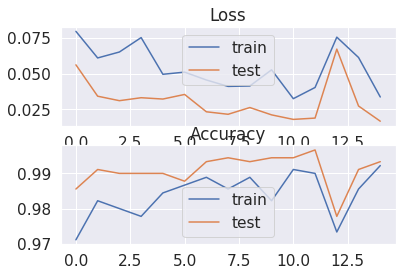

In [142]:
summarize_model(model, history,train_tensors , test_tensors)

In [180]:
pred=model.predict(test_tensors)

29/29 [==============================] - 1s 43ms/step


In [223]:
true_classes = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
              0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
               0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
               0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
               0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
               0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
               0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [187]:
import numpy
predicted_classes = numpy.argmax(pred, axis=1) 

In [188]:
import sklearn.metrics as metrics


In [224]:
report = metrics.classification_report(true_classes,predicted_classes)

In [225]:
print(report) 

              precision    recall  f1-score   support

           0       0.46      0.50      0.48       395
           1       0.58      0.54      0.56       505

    accuracy                           0.52       900
   macro avg       0.52      0.52      0.52       900
weighted avg       0.53      0.52      0.52       900



In [226]:
confusion_matrix = metrics.confusion_matrix(y_true=true_classes, y_pred=predicted_classes)

In [227]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


In [228]:
array = confusion_matrix

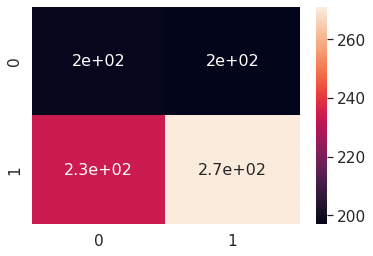

In [230]:
df_cm = pd.DataFrame(array, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()  

In [237]:
from sklearn.metrics import accuracy_score, precision_score , f1_score, recall_score

In [240]:
accuracy_score=(test_targets,pred)
print(accuracy_score)

(array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32), array([[6.4141843e-03, 9.9660516e-01],
       [9.9684381e-01, 3.6227955e-03],
       [9.9841285e-01, 2.1143549e-03],
       ...,
       [8.6576480e-04, 9.9947518e-01],
       [1.5419877e-06, 9.9999940e-01],
       [3.8622669e-04, 9.9948174e-01]], dtype=float32))


In [256]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier (n_estimators = 200, max_depth = 7,
max_features = 'sqrt', random_state = 18 ) . fit (train_targets, train_files)
## Predict your test set on the trained model

prediction = rf . predict (test_targets)

import pandas as pd
feature_imp = pd.Series(rf.feature_importances_, index = iris.feature_names).sort_values(ascending = False)
feature_imp


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

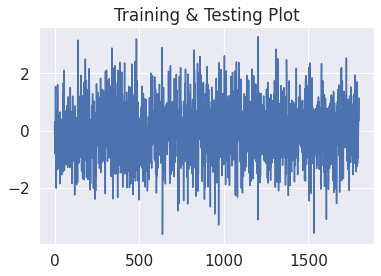

In [272]:
import numpy as np
from matplotlib import pyplot as plt

y = np.random.randn(1800)
x = [x for x in range(len(y))]

plt.plot(x, y, '-')
plt.fill_between(x, y, 200, where = (y > 195), facecolor='b', alpha=0.6)

plt.title("Training & Testing Plot")
plt.show()